## Adding Library and Uploading dataset

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00334/wiki4HE.csv', sep=';', na_values='?')
wiki4 = data.copy()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [74]:
wiki4.shape

(913, 53)

In [75]:
wiki4.head()

,AGE,GENDER,DOMAIN,PhD,YEARSEXP,UNIVERSITY,UOC_POSITION,OTHER_POSITION,OTHERSTATUS,USERWIKI,PU1,PU2,PU3,PEU1,PEU2,PEU3,ENJ1,ENJ2,Qu1,Qu2,Qu3,Qu4,Qu5,Vis1,Vis2,Vis3,Im1,Im2,Im3,SA1,SA2,SA3,Use1,Use2,Use3,Use4,Use5,Pf1,Pf2,Pf3,JR1,JR2,BI1,BI2,Inc1,Inc2,Inc3,Inc4,Exp1,Exp2,Exp3,Exp4,Exp5
0,40,0,2.0,1,14.0,1,2.0,NaN,NaN,0.0,4.0,4.0,3.0,5.0,5.0,3.0,4.0,4.0,3.0,3.0,2.0,2.0,3.0,3.0,3.0,1.0,2.0,4.0,2.0,4.0,4.0,4.0,3.0,1.0,1.0,2.0,4.0,1.0,1.0,3.0,4.0,1.0,2.0,3.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,1.0,2.0
1,42,0,5.0,1,18.0,1,2.0,NaN,NaN,0.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,3.0,2.0,3.0,3.0,1.0,1.0,2.0,1.0,4.0,4.0,4.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,4.0,3.0,2.0,2.0,4.0,4.0,3.0,4.0,2.0,2.0,4.0,2.0,4.0
2,37,0,4.0,1,13.0,1,3.0,NaN,NaN,0.0,2.0,2.0,2.0,4.0,4.0,3.0,3.0,3.0,2.0,2.0,2.0,5.0,3.0,2.0,3.0,2.0,2.0,4.0,3.0,4.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,4.0,3.0,1.0,1.0,5.0,3.0,5.0,5.0,2.0,2.0,2.0,1.0,3.0
3,40,0,4.0,0,13.0,1,3.0,NaN,NaN,0.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,2.0,2.0,3.0,5.0,5.0,5.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,5.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,3.0,4.0
4,51,0,6.0,0,8.0,1,3.0,NaN,NaN,1.0,4.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,4.0,3.0,4.0,4.0,4.0,4.0,3.0,2.0,3.0,5.0,5.0,5.0,3.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,3.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0


dari wiki4 diatas kebanyakan missing values terjadi di other position dan other status

### Menjumlahkan missing values dalam dataset

In [76]:
wiki4.isnull().sum()

AGE                 0
GENDER              0
DOMAIN              2
PhD                 0
YEARSEXP           23
UNIVERSITY          0
UOC_POSITION      113
OTHER_POSITION    261
OTHERSTATUS       540
USERWIKI            4
PU1                 7
PU2                11
PU3                 5
PEU1                4
PEU2               14
PEU3               97
ENJ1                7
ENJ2               17
Qu1                 7
Qu2                10
Qu3                15
Qu4                22
Qu5                29
Vis1               72
Vis2              117
Vis3                8
Im1                22
Im2                20
Im3                57
SA1                11
SA2                12
SA3                11
Use1               14
Use2               17
Use3                9
Use4               23
Use5               15
Pf1                11
Pf2                 6
Pf3                14
JR1                27
JR2                53
BI1                32
BI2                43
Inc1               35
Inc2      

# Mengubah missing values menjadi probabilitas nol

In [77]:
wiki4.fillna(0)

,AGE,GENDER,DOMAIN,PhD,YEARSEXP,UNIVERSITY,UOC_POSITION,OTHER_POSITION,OTHERSTATUS,USERWIKI,PU1,PU2,PU3,PEU1,PEU2,PEU3,ENJ1,ENJ2,Qu1,Qu2,Qu3,Qu4,Qu5,Vis1,Vis2,Vis3,Im1,Im2,Im3,SA1,SA2,SA3,Use1,Use2,Use3,Use4,Use5,Pf1,Pf2,Pf3,JR1,JR2,BI1,BI2,Inc1,Inc2,Inc3,Inc4,Exp1,Exp2,Exp3,Exp4,Exp5
0,40,0,2.0,1,14.0,1,2.0,0.0,0.0,0.0,4.0,4.0,3.0,5.0,5.0,3.0,4.0,4.0,3.0,3.0,2.0,2.0,3.0,3.0,3.0,1.0,2.0,4.0,2.0,4.0,4.0,4.0,3.0,1.0,1.0,2.0,4.0,1.0,1.0,3.0,4.0,1.0,2.0,3.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,1.0,2.0
1,42,0,5.0,1,18.0,1,2.0,0.0,0.0,0.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,3.0,2.0,3.0,3.0,1.0,1.0,2.0,1.0,4.0,4.0,4.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,4.0,3.0,2.0,2.0,4.0,4.0,3.0,4.0,2.0,2.0,4.0,2.0,4.0
2,37,0,4.0,1,13.0,1,3.0,0.0,0.0,0.0,2.0,2.0,2.0,4.0,4.0,3.0,3.0,3.0,2.0,2.0,2.0,5.0,3.0,2.0,3.0,2.0,2.0,4.0,3.0,4.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,4.0,3.0,1.0,1.0,5.0,3.0,5.0,5.0,2.0,2.0,2.0,1.0,3.0
3,40,0,4.0,0,13.0,1,3.0,0.0,0.0,0.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,2.0,2.0,3.0,5.0,5.0,5.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,5.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,3.0,4.0
4,51,0,6.0,0,8.0,1,3.0,0.0,0.0,1.0,4.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,4.0,3.0,4.0,4.0,4.0,4.0,3.0,2.0,3.0,5.0,5.0,5.0,3.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,3.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,43,0,5.0,1,21.0,2,0.0,0.0,2.0,0.0,3.0,3.0,3.0,5.0,5.0,2.0,4.0,5.0,3.0,3.0,4.0,5.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0,3.0,4.0,0.0,0.0,2.0,2.0,2.0,1.0,2.0,1.0,5.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
909,53,0,6.0,0,25.0,2,0.0,0.0,6.0,0.0,3.0,3.0,4.0,5.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,2.0,3.0,3.0,2.0,0.0,2.0,0.0,4.0,5.0,3.0,2.0,3.0,3.0,5.0,2.0,2.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0,1.0,1.0
910,39,0,5.0,1,9.0,2,0.0,0.0,4.0,0.0,3.0,3.0,3.0,5.0,4.0,3.0,3.0,4.0,3.0,3.0,2.0,5.0,2.0,2.0,4.0,1.0,1.0,2.0,0.0,4.0,5.0,4.0,3.0,1.0,1.0,1.0,3.0,5.0,5.0,3.0,3.0,1.0,2.0,2.0,5.0,4.0,3.0,0.0,5.0,5.0,5.0,4.0,1.0
911,40,0,3.0,1,10.0,2,0.0,0.0,2.0,0.0,3.0,3.0,5.0,5.0,4.0,2.0,4.0,4.0,4.0,4.0,3.0,2.0,5.0,3.0,2.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,3.0,1.0,5.0,5.0,0.0,1.0,2.0,4.0,4.0,2.0,5.0,5.0,1.0,5.0,2.0,2.0,4.0,4.0,2.0,1.0,1.0


Using PCA for Dimensionality Reduction

In [78]:
column_item1 = ['AGE', 'GENDER', 'DOMAIN', 'PhD', 'YEARSEXP', 'UNIVERSITY', 'UOC_POSITION', 'OTHER_POSITION',
                 'OTHERSTATUS', 'USERWIKI', 'ENJ1', 'ENJ2']
wiki_item = wiki4.copy()
wiki_item = wiki_item[column_item1]

In [79]:
wiki_item['DOMAIN'].fillna(0, inplace=True)
wiki_item['UOC_POSITION'].fillna(0, inplace=True)
wiki_item['OTHER_POSITION'].fillna(0, inplace=True)
wiki_item['OTHERSTATUS'].fillna(0, inplace=True)
wiki_item['USERWIKI'].fillna(0, inplace=True)
wiki_item['PhD'].fillna(0, inplace=True)
wiki_item['YEARSEXP'].fillna(0, inplace=True)

wiki_item.reset_index(drop=True, inplace=True) # menghapus ulang data yang tidak terpakai

## Sampling data menggunakan Sampling without replacement (SWR)

##### data yang digunakan (Age, Gender, PHD), setiap data yang dipilih dipisahkan dari populasi yang lain

In [80]:
gender = wiki_item['GENDER'].copy().replace({0: 'Male', 1: 'Female'}) # pengkategorian nomer 0 sebagai pria dan 1 sebagai wanita
phd = wiki_item['PhD'].copy().replace({0: 'No', 1: 'Yes'}) # pengkategorian nomer 1 sebagai bukan phd, 2 sebagai phd

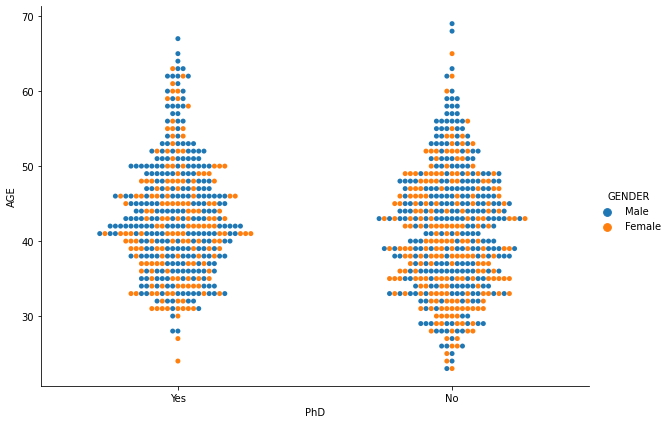

In [83]:
isPhd_df = pd.concat([wiki_item['AGE'].copy(), gender, phd], axis=1)
isPhd_df.columns = ['AGE', 'GENDER', 'PhD']
ax = sns.catplot(x='PhD', y='AGE', hue='GENDER', kind="swarm",
                 data=isPhd_df, height=6, aspect=1.4/1);